# ESG Claim Classification — Stage 1 (Binary) (ClimateBERT)

Use of AI Assistance: I already understood the importance of text preprocessing for transformer-based models, including normalization, URL removal, and symbol filtering. While implementing this step, I faced difficulties debugging my own regex patterns. To resolve this, I asked ChatGPT-4 for an example cleaning function. I then adapted the suggestion to suit my dataset and integrated it into my pipeline. The conceptual choice of preprocessing was entirely my own, and I validated the final implementation by inspecting cleaned samples and confirming that it preserved semantic meaning while removing unwanted noise.

### Environmental setup

In [ ]:
# Colab installs
!pip install -q "transformers>=4.44,<5" "datasets>=2.19" accelerate \
                 pandas scikit-learn numpy matplotlib

### Imports

In [ ]:
import os, re, ast, json, time, gc, itertools, random
from datetime import datetime

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback, DataCollatorWithPadding
)


### Stage-1 (YES/NO) — ClimateBERT Tuning + Final

Total S1 trials: 8

=== S1 trial 1/8 — t001_lr1e-05_bs8_ep4_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.278400,0.311829,0.881612,0.775120
2,0.218900,0.280845,0.904282,0.817308
3,0.185200,0.309490,0.911839,0.825871
4,0.158600,0.324530,0.916877,0.840580



=== S1 trial 2/8 — t002_lr1e-05_bs8_ep6_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.279100,0.312541,0.881612,0.775120
2,0.231600,0.267197,0.909320,0.828571
3,0.174900,0.292626,0.914358,0.831683
4,0.155300,0.355262,0.924433,0.851485
5,0.053500,0.364757,0.921914,0.848780



=== S1 trial 3/8 — t003_lr1e-05_bs16_ep4_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.429800,0.303062,0.866499,0.728205
2,0.225200,0.246137,0.899244,0.819820
3,0.169500,0.247137,0.906801,0.831050
4,0.159500,0.243794,0.909320,0.828571



=== S1 trial 4/8 — t004_lr1e-05_bs16_ep6_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.453800,0.301492,0.869018,0.734694
2,0.229300,0.237923,0.916877,0.847926
3,0.160200,0.241716,0.914358,0.839623



=== S1 trial 5/8 — t005_lr2e-05_bs8_ep4_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.405200,0.305634,0.904282,0.806122
2,0.190200,0.282914,0.914358,0.831683
3,0.166000,0.336582,0.919395,0.838384
4,0.098500,0.375197,0.924433,0.855769



=== S1 trial 6/8 — t006_lr2e-05_bs8_ep6_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.313700,0.360937,0.896725,0.791878
2,0.172400,0.265976,0.919395,0.849057
3,0.161000,0.363551,0.914358,0.828283



=== S1 trial 7/8 — t007_lr2e-05_bs16_ep4_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.317500,0.269782,0.899244,0.801980
2,0.212500,0.243432,0.921914,0.857143
3,0.129000,0.265584,0.919395,0.849057



=== S1 trial 8/8 — t008_lr2e-05_bs16_ep6_wd0.01_wr0.06_ml256 ===


Map:   0%|          | 0/1854 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:194: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  trainer = CETrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.341600,0.266304,0.896725,0.800000
2,0.207100,0.228251,0.921914,0.857143
3,0.130200,0.263134,0.921914,0.847291



Top trials by VAL F1:
                                        trial  learning_rate  train_bsz  \
0  t007_lr2e-05_bs16_ep4_wd0.01_wr0.06_ml256        0.00002         16   
1  t008_lr2e-05_bs16_ep6_wd0.01_wr0.06_ml256        0.00002         16   
2  t003_lr1e-05_bs16_ep4_wd0.01_wr0.06_ml256        0.00001         16   
3  t004_lr1e-05_bs16_ep6_wd0.01_wr0.06_ml256        0.00001         16   
4   t005_lr2e-05_bs8_ep4_wd0.01_wr0.06_ml256        0.00002          8   

   epochs  weight_decay  warmup_ratio  max_length  val_thr     val_P  val_R  \
0       4          0.01          0.06         256     0.30  0.794872   0.93   
1       6          0.01          0.06         256     0.30  0.794872   0.93   
2       4          0.01          0.06         256     0.35  0.779661   0.92   
3       6          0.01          0.06         256     0.40  0.794643   0.89   
4       4          0.01          0.06         256     0.30  0.831683   0.84   

     val_F1   val_Acc  test_P_at_valthr  test_R_at_valth

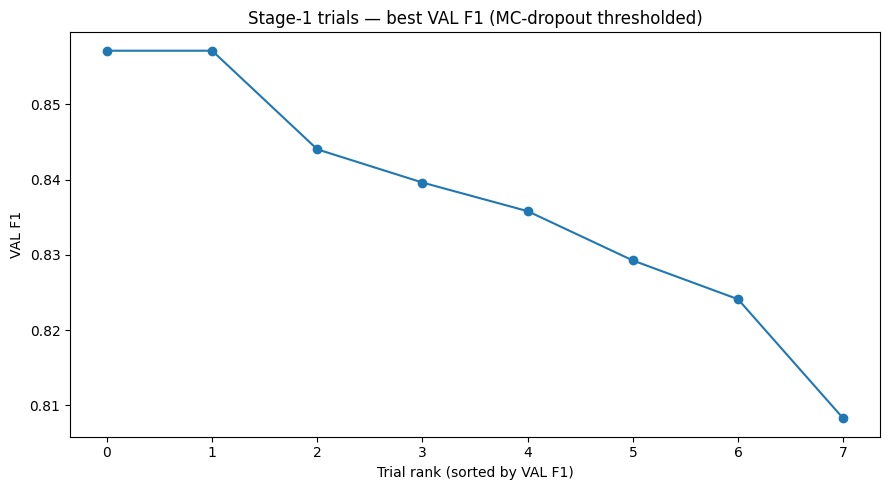

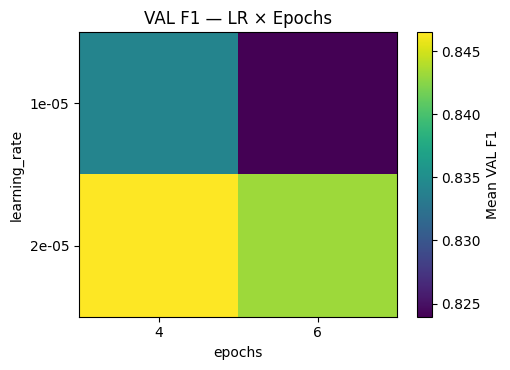


Selected best S1 hparams: {'lr': 2e-05, 'bsz': 16, 'epochs': 4, 'wd': 0.01, 'warmup': 0.06, 'max_len': 256, 'thr': 0.3}


Map:   0%|          | 0/2251 [00:00<?, ? examples/s]

Map:   0%|          | 0/397 [00:00<?, ? examples/s]

Map:   0%|          | 0/398 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3362820935.py:315: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CETrainer.__init__`. Use `processing_class` instead.
  final_trainer = CETrainer(



=== Stage-1 FINAL training (train+val) ===


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.319900,0.171319,0.924433,0.851485
2,0.179000,0.127721,0.947103,0.904977
3,0.144900,0.067972,0.987406,0.975610
4,0.073700,0.064131,0.984887,0.970874


Stage-1 FINAL train time: 60.0s

=== Stage-1 FINAL metrics @thr* (chosen on VAL during tuning) ===
TRAIN: {'P': 0.9254966887417219, 'R': 0.9858906525573192, 'F1': 0.9547395388556789, 'Acc': 0.9764549089293647, 'TP': 559, 'FP': 45, 'TN': 1639, 'FN': 8}
VAL:   {'P': 0.9423076923076923, 'R': 0.98, 'F1': 0.9607843137254902, 'Acc': 0.9798488664987406, 'TP': 98, 'FP': 6, 'TN': 291, 'FN': 2}
TEST:  {'P': 0.839622641509434, 'R': 0.89, 'F1': 0.8640776699029126, 'Acc': 0.9296482412060302, 'TP': 89, 'FP': 17, 'TN': 281, 'FN': 11}

Saved summary: models/stage1_yesno_distilroberta-base-climate-f_20250818_222438_BEST/s1_final_summary.csv


,split,P,R,F1,Acc,TP,FP,TN,FN
0,TRAIN,0.925497,0.985891,0.954740,0.976455,559,45,1639,8
1,VAL,0.942308,0.980000,0.960784,0.979849,98,6,291,2
2,TEST,0.839623,0.890000,0.864078,0.929648,89,17,281,11



Saved Stage-1 BEST to: models/stage1_yesno_distilroberta-base-climate-f_20250818_222438_BEST
Tuning artifacts: models/s1_tuning_distilroberta-base-climate-f_20250818_222438/s1_tuning_results.csv, plots in models/s1_tuning_distilroberta-base-climate-f_20250818_222438


In [ ]:

#  Configuration & Seeds                                                                                        ###
SEED = 42
CKPT_STAGE1 = "climatebert/distilroberta-base-climate-f"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True

torch.backends.cudnn.benchmark = False




#  Helpers                                                                                                               ###
def clean_text(s: str) -> str:
    s = s.lower()
    s = re.sub(r"http\S+|www\S+", "", s)
    s = re.sub(r"[^a-zA-Z0-9\s.,%-]", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s




def mc_dropout_yes_probs(mdl, tok, texts, n_passes=12, max_len=384):
    """Averaged yes-probabilities via MC-dropout."""
    was_training = mdl.training
    mdl.train()  # enable dropout layers
    with torch.no_grad():
        enc = tok(texts, return_tensors="pt", padding=True, truncation=True, max_length=max_len)\
                .to(next(mdl.parameters()).device)
        probs = []
        for _ in range(n_passes):
            logits = mdl(**enc).logits
            probs.append(torch.softmax(logits, dim=1)[:, 1].unsqueeze(0))
        p_yes = torch.cat(probs, dim=0).mean(0).cpu().numpy()
    mdl.train(was_training)
    return p_yes





def eval_at_threshold(p, y_true, thr=0.5):
    pred = (p >= thr).astype(int)
    P, R, F1, _ = precision_recall_fscore_support(y_true, pred, average='binary', zero_division=0)
    acc = accuracy_score(y_true, pred)

    cm = confusion_matrix(y_true, pred, labels=[0,1])
    TN, FP, FN, TP = cm.ravel()
    return dict(P=float(P), R=float(R), F1=float(F1), Acc=float(acc), TP=int(TP), FP=int(FP), TN=int(TN), FN=int(FN))


def sweep_best_threshold(p, y_true, lo=0.30, hi=0.70, step=0.05):
    thrs = np.arange(lo, hi + 1e-9, step)
    best = {"thr":0.5, "F1":-1}
    for t in thrs:
        s = eval_at_threshold(p, y_true, t)
        if s["F1"] > best["F1"]:
            best = {"thr":float(t), **s}
    return best



class CETrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        outputs = model(**inputs)
        loss = nn.functional.cross_entropy(outputs.logits, inputs["labels"])
        return (loss, outputs) if return_outputs else loss


def compute_metrics_bin(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    P, R, F1, _ = precision_recall_fscore_support(labels, preds, average='binary', zero_division=0)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": F1}

#  Load & preprocess                                                                                                     ###
df = pd.read_excel("fully_annotated_data.xlsx")
df = df.dropna(subset=["text"]).drop_duplicates(subset=["text"]).copy()
df["label"] = df["label"].str.lower().str.strip()
df["text_clean"] = df["text"].map(clean_text)

#  DROP 'tie'                                                                                                               ###
df_bin = df[df["label"].isin(["yes","no"])].copy()

# Labels / mapping                                                                                                          ###
LABELS_BIN = ["no","yes"]
lab2id_bin = {l:i for i,l in enumerate(LABELS_BIN)}
id2lab_bin = {i:l for i,l in enumerate(LABELS_BIN)}

# Stratified split: 70/15/15                                                                                                 ###
X_tr, X_tmp, y_tr, y_tmp = train_test_split(
    df_bin["text_clean"], df_bin["label"], test_size=0.30, stratify=df_bin["label"], random_state=SEED
)
X_va, X_te, y_va, y_te = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

#  Tokenization setup                                                                                                             ###
tokenizer = AutoTokenizer.from_pretrained(CKPT_STAGE1)
collator  = DataCollatorWithPadding(tokenizer=tokenizer)

def make_ds_bin(Xs, ys):
    return Dataset.from_dict({"text": Xs.tolist(), "label": [lab2id_bin[v] for v in ys]})

raw_train, raw_val, raw_test = make_ds_bin(X_tr,y_tr), make_ds_bin(X_va,y_va), make_ds_bin(X_te,y_te)

def tokenized(ds, max_len):
    return ds.map(lambda ex: tokenizer(ex["text"], truncation=True, max_length=max_len),
                  batched=True, remove_columns=["text"])




#   Hyperparameter tuning                                                                                       ###
grid = {
    "learning_rate":              [1e-5, 2e-5],
    "per_device_train_batch_size":[8, 16],
    "num_train_epochs":           [4, 6],
    "weight_decay":               [0.01],
    "warmup_ratio":               [0.06],
    "max_length":                 [256],
}
param_combos = list(itertools.product(
    grid["learning_rate"],
    grid["per_device_train_batch_size"],
    grid["num_train_epochs"],
    grid["weight_decay"],
    grid["warmup_ratio"],
    grid["max_length"],
))
print(f"Total S1 trials: {len(param_combos)}")

run_tag = datetime.now().strftime("%Y%m%d_%H%M%S")
tune_root = f"models/s1_tuning_{CKPT_STAGE1.split('/')[-1]}_{run_tag}"
os.makedirs(tune_root, exist_ok=True)

tuning_rows = []
MC_PASSES = 12
y_val_ids = np.array([lab2id_bin[v] for v in y_va])
y_tst_ids = np.array([lab2id_bin[v] for v in y_te])

for i, (lr, bsz, epochs, wd, warmup, max_len) in enumerate(param_combos, start=1):
    trial = f"t{i:03d}_lr{lr}_bs{bsz}_ep{epochs}_wd{wd}_wr{warmup}_ml{max_len}"
    out_dir = os.path.join(tune_root, trial)
    os.makedirs(out_dir, exist_ok=True)
    print(f"\n=== S1 trial {i}/{len(param_combos)} — {trial} ===")

    # Reset seeds & clear cache                                                                 ####
    random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)
    if torch.cuda.is_available(): torch.cuda.empty_cache()
    gc.collect()

    # Tokenize for this trial's max_len                                                              ###
    train_ds = tokenized(raw_train, max_len)
    val_ds   = tokenized(raw_val,   max_len)
    test_ds  = tokenized(raw_test,  max_len)

    # Model                                                                                       ###
    model = AutoModelForSequenceClassification.from_pretrained(
        CKPT_STAGE1, num_labels=2, id2label=id2lab_bin, label2id=lab2id_bin
    ).to(DEVICE)

    # Training args                                                                                 ###
    args = TrainingArguments(
        output_dir=out_dir,
        learning_rate=lr,
        per_device_train_batch_size=bsz,
        per_device_eval_batch_size=max(32, bsz),
        num_train_epochs=epochs,
        weight_decay=wd,
        warmup_ratio=warmup,
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1",
        greater_is_better=True,
        logging_steps=50,
        report_to="none",
        seed=SEED, data_seed=SEED,
        fp16=torch.cuda.is_available(),

    )

    trainer = CETrainer(
        model=model, args=args,
        train_dataset=train_ds, eval_dataset=val_ds,
        tokenizer=tokenizer, data_collator=collator,
        compute_metrics=compute_metrics_bin,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
    )

    t0 = time.time()
    trainer.train()
    train_time = time.time() - t0

      # MC-dropout on VAL, pick threshold; evaluate TEST at that thr                                                                         ###
    p_val = mc_dropout_yes_probs(trainer.model, tokenizer, X_va.tolist(), n_passes=MC_PASSES, max_len=max_len)
    best_val = sweep_best_threshold(p_val, y_val_ids)
    best_thr = best_val["thr"]

    p_tst = mc_dropout_yes_probs(trainer.model, tokenizer, X_te.tolist(), n_passes=MC_PASSES, max_len=max_len)
    tst_at_val = eval_at_threshold(p_tst, y_tst_ids, best_thr)

    tuning_rows.append({
        "trial": trial,
        "learning_rate": lr, "train_bsz": bsz, "epochs": epochs,
        "weight_decay": wd, "warmup_ratio": warmup, "max_length": max_len,
        "val_thr": best_thr,
        "val_P": best_val["P"], "val_R": best_val["R"], "val_F1": best_val["F1"], "val_Acc": best_val["Acc"],
        "test_P_at_valthr": tst_at_val["P"], "test_R_at_valthr": tst_at_val["R"],
        "test_F1_at_valthr": tst_at_val["F1"], "test_Acc_at_valthr": tst_at_val["Acc"],
        "train_time_sec": round(train_time, 2),
    })

    del trainer, model
    if torch.cuda.is_available(): torch.cuda.empty_cache()
    gc.collect()


#  Summarize tuning                                                                                                 ###
tune_df = pd.DataFrame(tuning_rows).sort_values("val_F1", ascending=False).reset_index(drop=True)
tune_csv = os.path.join(tune_root, "s1_tuning_results.csv")
tune_df.to_csv(tune_csv, index=False)
print("\nTop trials by VAL F1:\n", tune_df.head(5))
print(f"Tuning table saved: {tune_csv}")

# Plot: VAL F1 by trial rank                                                                                         ###
plt.figure(figsize=(9,5))
plt.plot(tune_df["val_F1"].values, marker="o")
plt.title("Stage-1 trials — best VAL F1 (MC-dropout thresholded)")
plt.xlabel("Trial rank (sorted by VAL F1)")
plt.ylabel("VAL F1")
plt.tight_layout()
plt.savefig(os.path.join(tune_root, "val_f1_by_trial.png"), dpi=150)
plt.show()

# Heatmap: LR × Epochs                                                                                                        ###
pivot = (tune_df
         .groupby(["learning_rate","epochs"])["val_F1"]
         .mean()
         .reset_index()
         .pivot(index="learning_rate", columns="epochs", values="val_F1"))
plt.figure(figsize=(5.2,3.8))
plt.imshow(pivot.values, aspect="auto")
plt.xticks(range(pivot.shape[1]), pivot.columns)

plt.yticks(range(pivot.shape[0]), [f"{v:.0e}" for v in pivot.index])
plt.colorbar(label="Mean VAL F1")
plt.title("VAL F1 — LR × Epochs")

plt.xlabel("epochs")
plt.ylabel("learning_rate")
plt.tight_layout()
plt.savefig(os.path.join(tune_root, "heatmap_lr_epochs.png"), dpi=150)
plt.show()


# Retrain FINAL model on train+val                                                                            ###
best = tune_df.iloc[0].to_dict()


BEST = {
    "lr": float(best["learning_rate"]),
    "bsz": int(best["train_bsz"]),
    "epochs": int(best["epochs"]),
    "wd": float(best["weight_decay"]),
    "warmup": float(best["warmup_ratio"]),
    "max_len": int(best["max_length"]),
    "thr": float(best["val_thr"])
}
print("\nSelected best S1 hparams:", BEST)



# Train + Val as final training set                                                                                       ###
full_train_texts  = pd.concat([X_tr, X_va], axis=0)
full_train_labels = pd.concat([y_tr, y_va], axis=0)

def make_and_tokenize(Xs, ys, max_len):
    ds = make_ds_bin(Xs, ys)
    return tokenized(ds, max_len)

full_ds = make_and_tokenize(full_train_texts, full_train_labels, BEST["max_len"])
val_ds  = tokenized(raw_val,  BEST["max_len"])
test_ds = tokenized(raw_test, BEST["max_len"])

final_dir = f"models/stage1_yesno_{CKPT_STAGE1.split('/')[-1]}_{run_tag}_BEST"
os.makedirs(final_dir, exist_ok=True)

final_model = AutoModelForSequenceClassification.from_pretrained(
    CKPT_STAGE1, num_labels=2, id2label=id2lab_bin, label2id=lab2id_bin
).to(DEVICE)

final_args = TrainingArguments(
    output_dir=final_dir,
    learning_rate=BEST["lr"],
    per_device_train_batch_size=BEST["bsz"],
    per_device_eval_batch_size=max(32, BEST["bsz"]),
    num_train_epochs=BEST["epochs"],
    weight_decay=BEST["wd"],
    warmup_ratio=BEST["warmup"],
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1",
    greater_is_better=True,
    logging_steps=50,
    report_to="none",
    seed=SEED, data_seed=SEED,
    fp16=torch.cuda.is_available(),
)

final_trainer = CETrainer(
    model=final_model, args=final_args,
    train_dataset=full_ds, eval_dataset=val_ds,
    tokenizer=tokenizer, data_collator=collator,
    compute_metrics=compute_metrics_bin,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("\n=== Stage-1 FINAL training (train+val) ===")
t0 = time.time(); final_trainer.train(); print(f"Stage-1 FINAL train time: {time.time()-t0:.1f}s")



#  Evaluate TRAIN / VAL / TEST with MC-dropout @ best thr                                                                                                    ###
def metrics_report(texts, labels_ids, model, tokenizer, thr, max_len, n_mc=MC_PASSES):
    p = mc_dropout_yes_probs(model, tokenizer, list(texts), n_passes=n_mc, max_len=max_len)
    stats = eval_at_threshold(p, labels_ids, thr)
    return stats, p

thr_star = BEST["thr"]

train_ids = np.array([lab2id_bin[v] for v in full_train_labels])
val_ids   = np.array([lab2id_bin[v] for v in y_va])
test_ids  = np.array([lab2id_bin[v] for v in y_te])

train_stats, _ = metrics_report(full_train_texts, train_ids, final_trainer.model, tokenizer, thr_star, BEST["max_len"])
val_stats,   _ = metrics_report(X_va,             val_ids,   final_trainer.model, tokenizer, thr_star, BEST["max_len"])
test_stats,  _ = metrics_report(X_te,             test_ids,  final_trainer.model, tokenizer, thr_star, BEST["max_len"])

print("\n=== Stage-1 FINAL metrics @thr* (chosen on VAL during tuning) ===")
print("TRAIN:", train_stats)
print("VAL:  ", val_stats)
print("TEST: ", test_stats)

# Summary table (TRAIN / VAL / TEST)                                                                                                                      ###
summary_df = pd.DataFrame([
    {"split":"TRAIN", **train_stats},
    {"split":"VAL",   **val_stats},
    {"split":"TEST",  **test_stats},
])
summary_csv = os.path.join(final_dir, "s1_final_summary.csv")
summary_df.to_csv(summary_csv, index=False)
print(f"\nSaved summary: {summary_csv}")
display(summary_df)

#Save deploy bundle                                                                                                               ##3
final_trainer.save_model(final_dir); tokenizer.save_pretrained(final_dir)
deploy_cfg = {
    "threshold": thr_star,
    "mc_passes": MC_PASSES,
    "label2id": lab2id_bin, "id2label": id2lab_bin,
    "backbone": CKPT_STAGE1,
    "best_hparams": BEST,
    "metrics": {
        "train": train_stats,
        "val":   val_stats,
        "test":  test_stats
    }
}
with open(os.path.join(final_dir, "deploy_config.json"), "w") as f:
    json.dump(deploy_cfg, f, indent=2)

print(f"\nSaved Stage-1 BEST to: {final_dir}")
print(f"Tuning artifacts: {tune_csv}, plots in {tune_root}")

